### Exercise 1
Time series scaling exercise. Download audio file ’kuusi.wav’ from Moodle 1st folder to
your own work folder and load it to Python:

Import libraries

In [21]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from scipy.io import wavfile
from scipy.stats import skew,kurtosis
from IPython.display import Audio
from tqdm import tqdm

Read the wav file and ue float64 as "double"

In [4]:
Fs, y = wavfile.read('Kuusi.wav')
y = y.astype(np.float64)

remove mean and scale between -1 and 1 and Plot for visualization

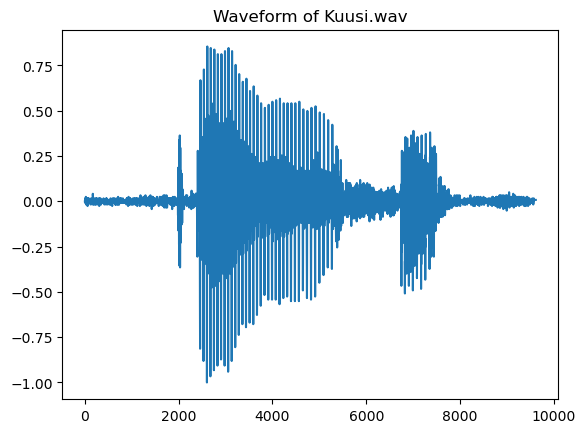

Sampling rate:  8000


In [5]:
y = y - np.mean(y)
y = y / np.max(np.abs(y))

plt.figure()
plt.plot(y)
plt.title('Waveform of Kuusi.wav')
plt.show()

print('Sampling rate: ', Fs)

### Exercise 2

Load the audio file using Librosa and play the audio with different sampling rates

In [7]:
y_low, sr = librosa.load('Kuusi.wav', sr=8000)
Audio(data=y_low, rate=sr)


In [11]:
y_low, sr = librosa.load('Kuusi.wav', sr=3000)
Audio(data=y_low, rate=sr)

Audio samples sound clearly different when altering the sampling rate. With 3kHz sampling rate, the audio can be heard and understood but with lower quality. If sr = 2000 or lower, Pyaudio is not able to produce anything to play.

Plot waveform for both sampling rates

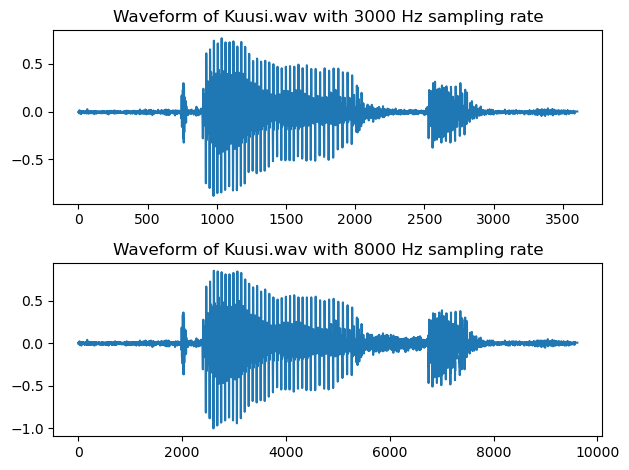

In [12]:
plt.subplot(2, 1, 1)
plt.plot(y_low)
plt.title('Waveform of Kuusi.wav with 3000 Hz sampling rate')
plt.subplot(2, 1, 2)
plt.plot(y)
plt.title('Waveform of Kuusi.wav with 8000 Hz sampling rate')
plt.tight_layout()
plt.show()

The threshold for playing the sound is about 2khz. When applying the 2kHz for sampling rate, the IPython.display Audio is not able to play the sound (Other python sound playing libraries did not work in my wsl environment). However, the word "Kuusi" is recognizable from the 3kHz sound but the sound quality is much worse. 3kHz sounds like there is an object between mic and speaker and he is in a some sort of tunnel. 


### Exercise 3

Read file again and save to y and data variables

In [13]:
Fs, data = wavfile.read('Kuusi.wav')
data = data.astype(np.float64)

Content from average_filter.py is copied below to apply for kuusi.wav

In [16]:
def average_filter(data, len1, len2):
	#len1=100 #length of the average filter (trend) (1+2*len)=window size
	#len2=150 #longer trend (1+2*len2)

	x=data*0	#fast initialization
	x2=data*0
	x3=x2
	x4=x2
	for i in tqdm(range(len(data))):
		start=i-len1
		if start<1: #for initializing the window
			start=1
		start2=i-len2
		if start2<1: #for initializing the window2
			start2=1

		ending=i+len1    
		if ending>len(data):   #taking care of the 
			ending=len(data)	#end of the window

		ending2=i+len2    
		if ending2>len(data):  #taking care of the 
			ending2=len(data) 	#end of the window2

		if len(data[start:ending])<2:
			x[i]=0
		else:
			x[i]=np.mean(data[start:ending])  #sliding window mean
		if len(data[start2:ending2])<2:
			x2[i]=0
		else:
			x2[i]=np.mean(data[start2:ending2]) #sliding window mean
			x3[i]=skew(data[start2:ending2],axis=0, bias=True)
			x4[i]=kurtosis(data[start2:ending2],axis=0, bias=True)
	return x, x2, x3, x4

x, x2, x3, x4 = average_filter(data, 100, 150)


100%|██████████| 9615/9615 [00:03<00:00, 2814.15it/s]


Plot results

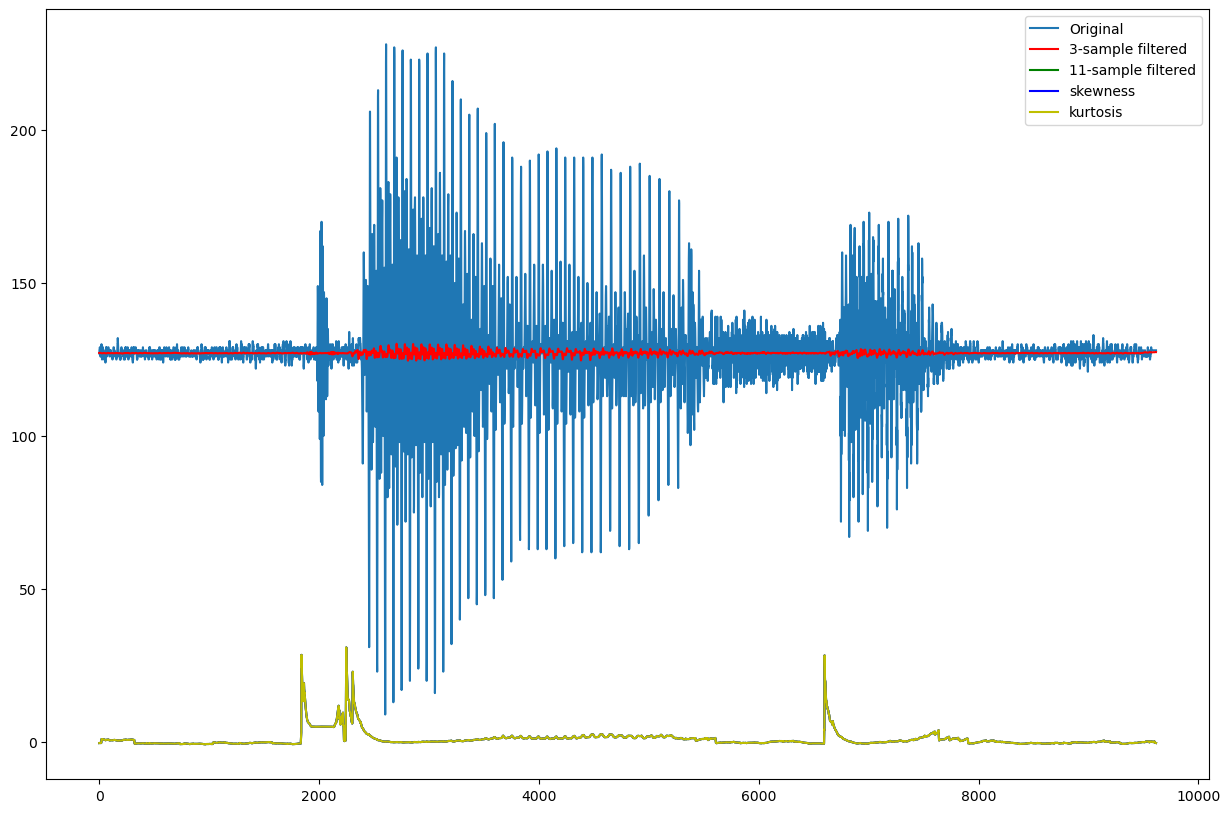

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(data)
plt.plot(x,'r')
plt.plot(x2,'g') #plot the results
plt.plot(x3,'b')
plt.plot(x4,'y') #plot the results
plt.legend(['Original','3-sample filtered','11-sample filtered', 'skewness', 'kurtosis'])
plt.show()

Lets have closer look and zoom in to see the differences

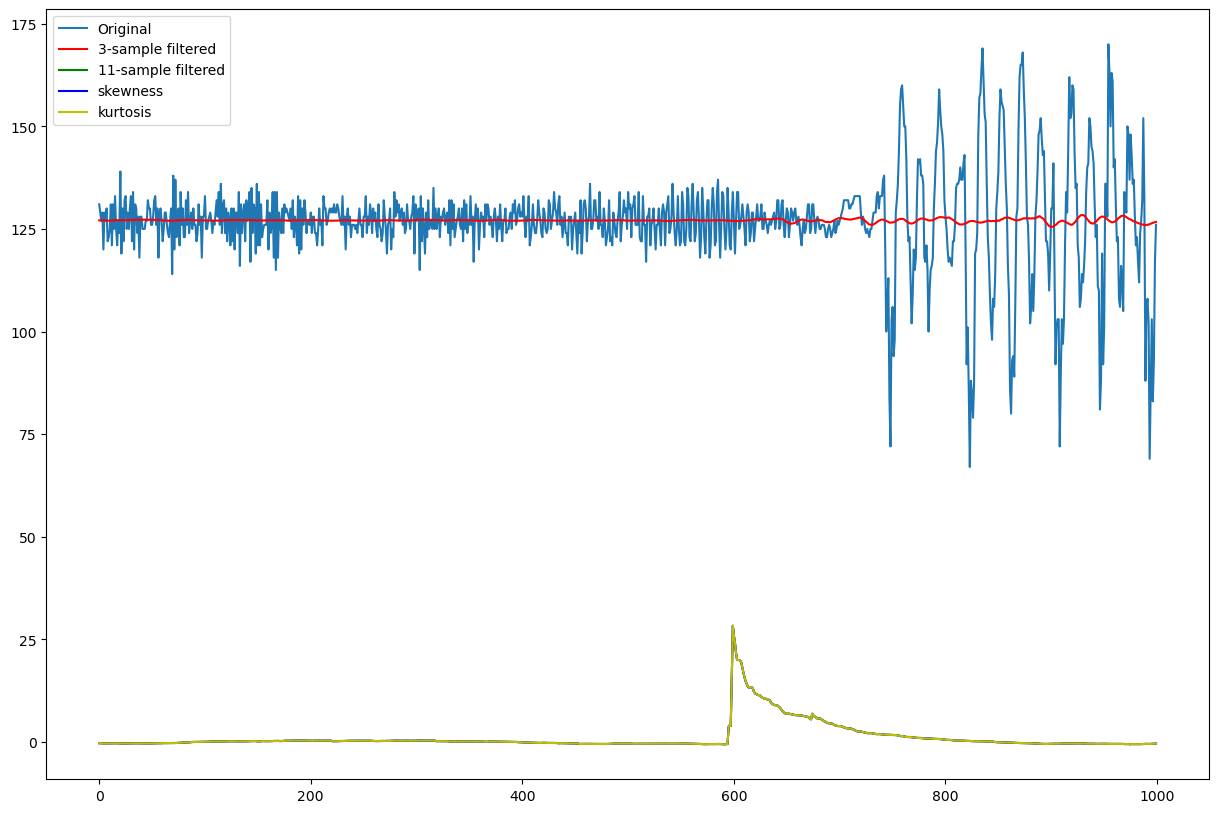

In [20]:
plt.figure(figsize=(15, 10))
plt.plot(data[6000:7000])
plt.plot(x[6000:7000],'r')
plt.plot(x2[6000:7000],'g')
plt.plot(x3[6000:7000],'b')
plt.plot(x4[6000:7000],'y')
plt.legend(['Original','3-sample filtered','11-sample filtered', 'skewness', 'kurtosis'])
plt.show()

When experimenting windows size len1, the red curve is more smooth. In context of machine processing this helps situations where signal have many sections where it is stable and where it has lot of amplitude, for example this Kuusi.wav audio file. Machine can for example detect more weightly areas.

When incresing value for len2, the skewness and kurtosis curve gets more smooth. Lower value makes it more accurate for smaller windows. However, results are the same for skew and kurtosis. However, the curves makes sense as they should have larger values when the window has a tail on the positive side. This results in the peaks before the sections with larger amplitude. for example before the word "Kuusi" and in the middle of when speaker says the end part "si".

Skew computes shape of the data. For example in situations where major amount of higher values of an array is in the right side or in the left side. For symmetrical array/dataset this results in zero value. This may be useful in classification or regression models as it can be useful for detecting important areas from the dataset. This may result in better scores and results.

Kurtosis measures peaks of the distribution. It measures slighty the same as skew but with different focus point. Kurtosis measures the tailedness of a array/dataset as how stable or smooth the distribution is. Therefore the results are similar for the audio "kuusi". This may be useful in classification or regression models in the same way as usage of kurtosis may produce more accurate scores for certain datasets. For example classifying audiosignal where we'd like to classify high amplitude areas in some way.

Python function Moment calculates nth moments of mean for samples. Skewness and kurtosis are measured using the equation for moment. Using different n powers to the equeation results in different statistics as centrality, mean, skewness and kurtosis.

Open AMZN.pkl file and apply average filter for column with opening prices.

In [22]:
with open('AMZN.pkl', 'rb') as f:
    amzn_data = pickle.load(f)

df = pd.DataFrame(amzn_data)
open_price = df['Open']

x, x2, x3, x4 = average_filter(open_price, 20, 30)


100%|██████████| 251/251 [00:00<00:00, 1851.80it/s]


Plot results

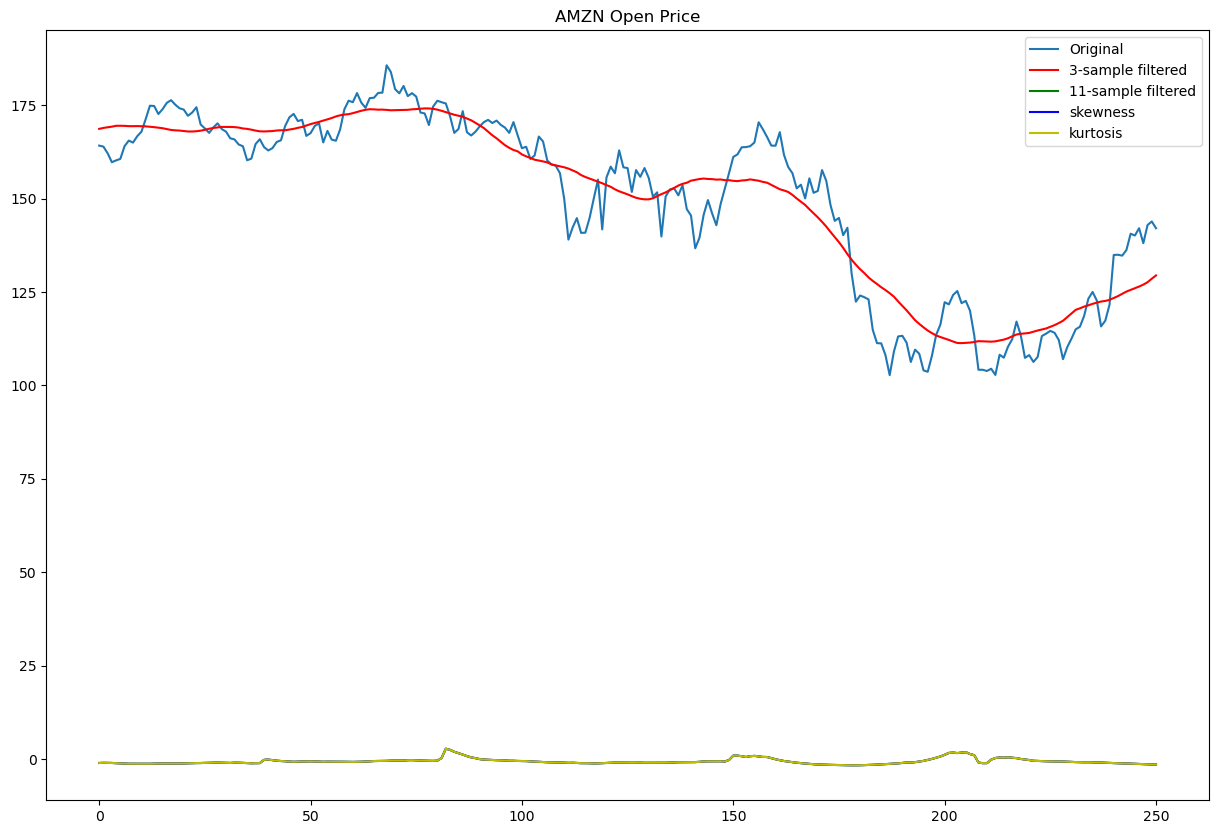

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(open_price)
plt.plot(x,'r')
plt.plot(x2,'g') #plot the results
plt.plot(x3,'b')
plt.plot(x4,'y') #plot the results
plt.title('AMZN Open Price')
plt.legend(['Original','3-sample filtered','11-sample filtered', 'skewness', 'kurtosis'])
plt.show()

With window size (len1) above 5 gives good moving average for the stock opening prices. Increasing the values gives more smooth curve as the average length is larger. Good lenghts for moving average are for example 20, 50 and 200. For longer trend (len2), using values above 20, gives smooth curve for skewness and kurtosis.

### Exercise 4

- What is your own opinion about machine learning, what does it contain?

Machine learning includes original problem, learning process, final model and finding solutions using the final model. The overall need is to get suitable output from chosen dataset given the problem. The data needs to be pre processed for machine learning models. The model need to be selected regarding the problem and tested using the predefined test dataset. Thus, the model can be used to different datasets regarding the same problem to find solutions.

- Why are the neural networks having so dominant role in machine learning?

Neural networks have become dominant due to their better performance over traditional machine learning algorithms. By performance, I mean better detection of patterns and/or features. They also require less feature engineering as traditional ML algorithms. Neural network methods also are more efficient in the computing.

- Why there are so many architectures in neural networks?

Different architectures are designed to solve certain problems more efficiently, i.e. more optimized to tasks. For example, convolutional neural networks (CNN) are commonly used for image and video processing as they can split images and learn from smaller feature engineered windows, which result in better results. Recurrent neural networks (RNN) works well with text predictions as they can hold contextual data from the past. These CNN and RNN can be constructed in different architectures by shifting layers and functions inside them.

- How is the architecture decided?

Architecture is decided by selection. It is proven and studied that some architectures work well for certain problems. As the model is fitted for the situation, it can be further studied and finetuned to find the best architecture for the situation. This can be a computing needy and time consuming process, which require deep knowledge of the architecture and machine learning algorithms.